In [1]:
from importlib.resources import path

import pandas as pd

from alethia import (
    alethia,
    get_available_models,
    get_model_recommendation,
    print_model_classification_guide,
)

# Alethia models

Alethia is designed to work out-of-the-box for most text correction scenarios, which is why fuzzy matching is the default approach. This ensures immediate functionality without requiring additional dependencies, model downloads, or configuration.
Default: Fast and Reliable Fuzzy Matching
Fuzzy matching provides excellent results for the most common text correction scenarios:

Typos and misspellings: "Googel" → "Google"

Character transpositions: "Microsft" → "Microsoft"

Missing or extra characters: "Aplpe" → "Apple"

Case variations: "mICROSOFT" → "Microsoft"

For these standard use cases, fuzzy matching is fast, accurate, and requires no additional setup.
When to Upgrade to LLM Embeddings
While fuzzy matching handles most scenarios well, LLM embedding-based matching becomes valuable when dealing with:

Semantic variations: "Big Apple" → "New York City"

Abbreviations and acronyms: "WHO" → "World Health Organization"

Domain-specific terminology: "MI" → "myocardial infarction"

Synonyms and alternate names: "City of Angels" → "Los Angeles"

# The Challenge: Choosing the Right LLM Model

LLM embeddings offer powerful semantic matching capabilities, but the abundance of available models can be overwhelming. With hundreds of embedding models available across different backends (SentenceTransformers, FastEmbed, OpenAI, Gemini), each optimized for different use cases, selecting the right model requires careful consideration of:

- Domain specificity (general vs. medical vs. legal vs. technical)
- Model size and performance tradeoffs
- Computational requirements (CPU vs. GPU, memory usage)
- Speed vs. accuracy balance

To help you navigate this complexity, alethia provides you guidance on:

- Performance benchmarks from MTEB (Massive Text Embedding Benchmark)
- Size and computational requirement comparisons
- Recommendations based on your specific needs and constraints

This ensures you can confidently upgrade from fuzzy matching to the most appropriate LLM embedding approach for your particular text correction challenges.

In [2]:
print_model_classification_guide()

🎯 Embedding Model Classification & Recommendation Guide

📂 LIGHTWEIGHT CATEGORY
Description: Fast, lightweight models for speed-critical applications
Characteristics: Low (< 200MB), Good quality
Best for: Speed over quality

Models in this category:
  • all-MiniLM-L6-v2
    Memory: 90MB | Dimensions: 384 | Use: Speed-critical applications, prototyping
  • nomic-embed-text
    Memory: 600MB | Dimensions: 768 | Use: Efficient embeddings, research applications
  • phi3
    Memory: 4GB | Dimensions: 3072 | Use: Efficient deployments, edge computing
  • gemma
    Memory: 2-7GB | Dimensions: 2048-3072 | Use: Lightweight applications, edge deployment
When to use: When you need fast inference and can accept slightly lower quality
Avoid when: Maximum quality is required
--------------------------------------------------

📂 FAST EMBEDDING CATEGORY
Description: Ultra-fast, optimized embedding models prioritizing speed and efficiency
Characteristics: Very Low (67MB - 250MB), Good to Very Good qual

In [3]:
models = get_available_models()
models.keys()

dict_keys(['sentence-transformers', 'fastembed', 'openai', 'gemini', 'rapidfuzz'])

In [4]:
st_models = models["sentence-transformers"].sort_values(
    by=["mteb_rank"], ascending=True
)
st_models = st_models[st_models["mteb_rank"].notna()].sort_values(
    by=["mteb_rank"], ascending=True
)
st_models

,model,backend,available,dimensions,size_in_GB,estimated_params,organization,size_category,best_use_case,data_source,...,mteb_overall_score,max_seq_length,parameters,retrieval_score,classification_score,clustering_score,sts_score,reranking_score,category,category_description
0,Qwen3-Embedding-8B,sentence-transformers,True,4096,28.19,NaN,NaN,NaN,NaN,MTEB,...,70.58,32768.0,7B,70.88,74.00,57.65,81.08,65.63,uncategorized,NaN
1,Qwen3-Embedding-4B,sentence-transformers,True,2560,14.98,NaN,NaN,NaN,NaN,MTEB,...,69.45,32768.0,4B,69.60,72.33,57.15,80.86,65.08,uncategorized,NaN
2,Qwen3-Embedding-0.6B,sentence-transformers,True,1024,2.22,NaN,NaN,NaN,NaN,MTEB,...,64.34,32768.0,595M,64.65,66.83,52.33,76.17,61.41,uncategorized,NaN
3,Linq-Embed-Mistral,sentence-transformers,True,4096,13.25,NaN,NaN,NaN,NaN,MTEB,...,61.47,32768.0,7B,58.69,62.24,50.60,74.86,64.37,uncategorized,NaN
4,gte-Qwen2-7B-instruct,sentence-transformers,True,3584,28.36,NaN,NaN,NaN,NaN,MTEB,...,62.51,32768.0,7B,60.08,61.55,52.77,73.98,65.55,uncategorized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,pubmedbert-base-embeddings-8M,sentence-transformers,True,256,0.03,NaN,NaN,NaN,NaN,MTEB,...,NaN,NaN,7M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
240,XYZ-embedding,sentence-transformers,True,768,1.21,NaN,NaN,NaN,NaN,MTEB,...,NaN,512.0,326M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
241,Qodo-Embed-1-1.5B,sentence-transformers,True,1536,6.62,NaN,NaN,NaN,NaN,MTEB,...,NaN,32768.0,1B,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
242,pubmedbert-base-embeddings-500K,sentence-transformers,True,64,0.00,NaN,NaN,NaN,NaN,MTEB,...,NaN,NaN,500K,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN


In [5]:
# checl memory requirement is <10GB
st_models[st_models.size_in_GB < 5]

,model,backend,available,dimensions,size_in_GB,estimated_params,organization,size_category,best_use_case,data_source,...,mteb_overall_score,max_seq_length,parameters,retrieval_score,classification_score,clustering_score,sts_score,reranking_score,category,category_description
2,Qwen3-Embedding-0.6B,sentence-transformers,True,1024,2.22,NaN,NaN,NaN,NaN,MTEB,...,64.34,32768.0,595M,64.65,66.83,52.33,76.17,61.41,uncategorized,NaN
5,multilingual-e5-large-instruct,sentence-transformers,True,1024,1.04,335M,intfloat,large,"Multilingual applications, cross-lingual tasks",MTEB+Curated,...,63.22,514.0,560M,57.12,64.94,50.75,76.81,62.61,uncategorized,NaN
12,bilingual-embedding-large,sentence-transformers,True,1024,2.09,NaN,NaN,NaN,NaN,MTEB,...,60.96,514.0,559M,55.10,62.77,46.49,77.81,61.42,uncategorized,NaN
15,jasper_en_vision_language_v1,sentence-transformers,True,8960,3.71,NaN,NaN,NaN,NaN,MTEB,...,NaN,131072.0,1B,55.12,NaN,NaN,71.50,NaN,uncategorized,NaN
17,Solon-embeddings-large-0.1,sentence-transformers,True,1024,2.09,NaN,NaN,NaN,NaN,MTEB,...,59.63,514.0,559M,55.69,60.84,43.86,72.98,62.02,uncategorized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Ops-MoA-Yuan-embedding-1.0,sentence-transformers,True,1536,1.95,NaN,NaN,NaN,NaN,MTEB,...,NaN,512.0,343M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
237,Ops-MoA-Conan-embedding-v1,sentence-transformers,True,1536,1.95,NaN,NaN,NaN,NaN,MTEB,...,NaN,512.0,343M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
239,pubmedbert-base-embeddings-8M,sentence-transformers,True,256,0.03,NaN,NaN,NaN,NaN,MTEB,...,NaN,NaN,7M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN
240,XYZ-embedding,sentence-transformers,True,768,1.21,NaN,NaN,NaN,NaN,MTEB,...,NaN,512.0,326M,NaN,NaN,NaN,NaN,NaN,uncategorized,NaN


In [6]:
models["fastembed"]

,model,size_in_GB,dim
0,BAAI/bge-small-en-v1.5,0.067,384
1,sentence-transformers/all-MiniLM-L6-v2,0.090,384
2,BAAI/bge-small-zh-v1.5,0.090,512
3,snowflake/snowflake-arctic-embed-xs,0.090,384
4,jinaai/jina-embeddings-v2-small-en,0.120,512
5,BAAI/bge-small-en,0.130,384
6,nomic-ai/nomic-embed-text-v1.5-Q,0.130,768
7,snowflake/snowflake-arctic-embed-s,0.130,384
8,BAAI/bge-base-en-v1.5,0.210,768
9,sentence-transformers/paraphrase-multilingual-...,0.220,384


In [7]:
models["rapidfuzz"]

,method,description
0,token_sort_ratio,Token-based similarity with sorting
1,token_set_ratio,Token-based similarity with set operations
2,ratio,Standard Levenshtein ratio
3,partial_ratio,Partial string matching


In [8]:
with path("alethia.data", "India_district_mappings.csv") as data_path:
    df = pd.read_csv(data_path)
df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [9]:
target_list = list(df["2001"])
correct_entries = target_list
reference_entries = [x for x in list(set(target_list)) if str(x) != "nan"]

In [10]:
help(alethia)

Help on function alethia in module alethia.alethia:

alethia(
    dirty_entries: List[str],
    reference_entries: List[str],
    model: str = 'rapidfuzz',
    backend: str = 'auto',
    force_cpu: bool = True,
    use_batch_optimization: bool = True,
    threshold: float = 0.7,
    verbose: bool = False,
    use_exact_matching: bool = True,
    exact_match_case_sensitive: bool = False,
    return_model_attrs: bool = True,
    drop_duplicates: bool = True,
    remove_identical_hits: bool = False,
    **kwargs
) -> pandas.core.frame.DataFrame
    Main Alethia function with exact match pre-filtering and optimizations

    Args:
        dirty_entries: List of incorrect entries
        reference_entries: List of reference entries
        model: Model name
        backend: Backend to use ('auto', 'sentence-transformers', 'fastembed', 'rapidfuzz', 'openai', 'gemini')
        force_cpu: Force CPU usage
        use_batch_optimization: Use batch optimization
        threshold: Similarity thresh

In [11]:
col = "1951"
incorrect_entries = df[col].tolist()
alethia_output_rapidfuzz = alethia(
    incorrect_entries, reference_entries, remove_identical_hits=True
)
alethia_output_rapidfuzz

RapidFuzz matching: 100%|████████████████████████████████████████████████████| 231/231 [00:00<00:00, 8775.25it/s]


,given_entity,alethia_prediction,alethia_score,alethia_method,alethia_backend
0,Andaman and Nicobar,Andaman and Nicobar Islands,0.826087,rapidfuzz,auto
5,Vizagapatnam,Visakhapatnam,0.800000,rapidfuzz,auto
29,Balipara Frontier Tract,Purba Champaran,0.473684,rapidfuzz,auto
35,Abor Hills,West Garo Hills,0.560000,rapidfuzz,auto
39,Mishmi Hills,Jaintia Hills,0.640000,rapidfuzz,auto
...,...,...,...,...,...
617,Dehra Dun,Kanpur Dehat,0.571429,rapidfuzz,auto
621,West Dinajpur,Uttar Dinajpur,0.740741,rapidfuzz,auto
626,24 - Parganas,Varanasi,0.571429,rapidfuzz,auto
634,Midnapur,Midnapore,0.823529,rapidfuzz,auto


In [12]:
alethia_output_fastembed = alethia(
    incorrect_entries,
    reference_entries,
    model="sentence-transformers/all-MiniLM-L6-v2",
    remove_identical_hits=True,
)
alethia_output_fastembed

,given_entity,alethia_prediction,alethia_score,alethia_method,alethia_backend
0,Andaman and Nicobar,Andaman and Nicobar Islands,0.783159,sentence-transformers/all-MiniLM-L6-v2,fastembed
5,Vizagapatnam,Vizianagaram,0.729009,sentence-transformers/all-MiniLM-L6-v2,fastembed
64,United Mikir and North Cachar Hills,North Cachar Hills,0.734694,sentence-transformers/all-MiniLM-L6-v2,fastembed
66,Garo Hills,South Garo Hills,0.915495,sentence-transformers/all-MiniLM-L6-v2,fastembed
69,United Khasi and Jaintia Hills,Jaintia Hills,0.802065,sentence-transformers/all-MiniLM-L6-v2,fastembed
87,Shahabad,Allahabad,0.883773,sentence-transformers/all-MiniLM-L6-v2,fastembed
94,Champaran,Purba Champaran,0.780129,sentence-transformers/all-MiniLM-L6-v2,fastembed
135,Singhbhum,Purbi Singhbhum,0.822060,sentence-transformers/all-MiniLM-L6-v2,fastembed
154,NaN,NaN,NaN,sentence-transformers/all-MiniLM-L6-v2,fastembed
155,Delhi,New Delhi,0.869361,sentence-transformers/all-MiniLM-L6-v2,fastembed


In [13]:
alethia_output_fastembed[
    alethia_output_fastembed.given_entity == "Balipara Frontier Tract"
]

,given_entity,alethia_prediction,alethia_score,alethia_method,alethia_backend


In [14]:
alethia_output_rapidfuzz[
    alethia_output_rapidfuzz.given_entity == "Balipara Frontier Tract"
]

,given_entity,alethia_prediction,alethia_score,alethia_method,alethia_backend
29,Balipara Frontier Tract,Purba Champaran,0.473684,rapidfuzz,auto


In [15]:
alethia_output_fastembed.shape

(41, 5)

In [16]:
alethia_output_nomic = alethia(
    incorrect_entries, reference_entries, model="nomic-ai/nomic-embed-text-v1.5"
)
alethia_output_nomic

,given_entity,alethia_prediction,alethia_score,alethia_method,alethia_backend
0,Andaman and Nicobar,Andaman and Nicobar Islands,0.889155,nomic-ai/nomic-embed-text-v1.5,fastembed
3,Srikakulam,Srikakulam,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
5,Vizagapatnam,Visakhapatnam,0.785656,nomic-ai/nomic-embed-text-v1.5,fastembed
7,East Godavari,East Godavari,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
8,West Godavari,West Godavari,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
...,...,...,...,...,...
631,Burdwan,Burdwan,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
632,Birbhum,Birbhum,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
633,Bankura,Bankura,1.000000,nomic-ai/nomic-embed-text-v1.5,fastembed
634,Midnapur,Midnapore,0.845985,nomic-ai/nomic-embed-text-v1.5,fastembed


# Plotting 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

from alethia import do_pca, do_umap, get_embeddings, plot_embedding, setup_matplotlib

%matplotlib inline

setup_matplotlib()

In [18]:
with path("alethia.data", "India_district_mappings.csv") as data_path:
    district_mapping_df = pd.read_csv(data_path)
district_mapping_df

,State,1951,1961,1971,1981,1991,2001
0,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands
1,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman,Andaman,Andaman
2,Andaman and Nicobar Islands,Andaman and Nicobar,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Nicobar,Nicobar,Nicobar
3,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam,Srikakulam
4,Andhra Pradesh,Srikakulam,Srikakulam,Srikakulam,Vizianagaram,Vizianagaram,Vizianagaram
...,...,...,...,...,...,...,...
631,West Bengal,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan,Burdwan
632,West Bengal,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum,Birbhum
633,West Bengal,Bankura,Bankura,Bankura,Bankura,Bankura,Bankura
634,West Bengal,Midnapur,Midnapore,Midnapore,Midnapore,Midnapore,Midnapore


In [19]:
with path("alethia.data", "India_all_state_districts.csv") as data_path:
    india_districts = pd.read_csv(data_path)
india_districts

districts_to_keep = india_districts.dtname.value_counts()
districts_to_keep = districts_to_keep[districts_to_keep < 2]

reference_entries = set(india_districts["dtname"])
reference_entries = districts_to_keep.index.tolist()
india_districts_reduced = india_districts[
    india_districts.dtname.isin(districts_to_keep.index.tolist())
]

palette = (
    list(sns.color_palette("tab20"))
    + list(sns.color_palette("Set3", 12))
    + list(sns.color_palette("Dark2", 8))
)

palette = palette[:36]
valid_df = india_districts_reduced[
    india_districts_reduced["dtname"].isin(reference_entries)
].copy()
unique_states = valid_df["stname"].unique()
color_map = dict(zip(unique_states, palette))
labels = valid_df["dtname"].tolist()
states = valid_df["stname"].tolist()

In [20]:
model = "sentence-transformers/all-MiniLM-L6-v2"

embedding = get_embeddings(
    texts=labels,
    model=model,
    return_labels=False,
    show_progress=True,
)

Loading sentence-transformers/all-MiniLM-L6-v2 on CPU
✅ Successfully loaded sentence-transformers/all-MiniLM-L6-v2


Generating Embeddings: 100%|██████████████████████████████████████████████████| 775/775 [00:05<00:00, 140.24it/s]


In [21]:
pca = do_pca(embedding)

In [22]:
pca, exp_var = do_pca(embedding, return_expl_var=True)

In [23]:
exp_var

array([6.6629157, 3.5566516], dtype=float32)

In [24]:
umap = do_umap(embedding)

/Users/saket/miniconda3/envs/alethia3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/saket/miniconda3/envs/alethia3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


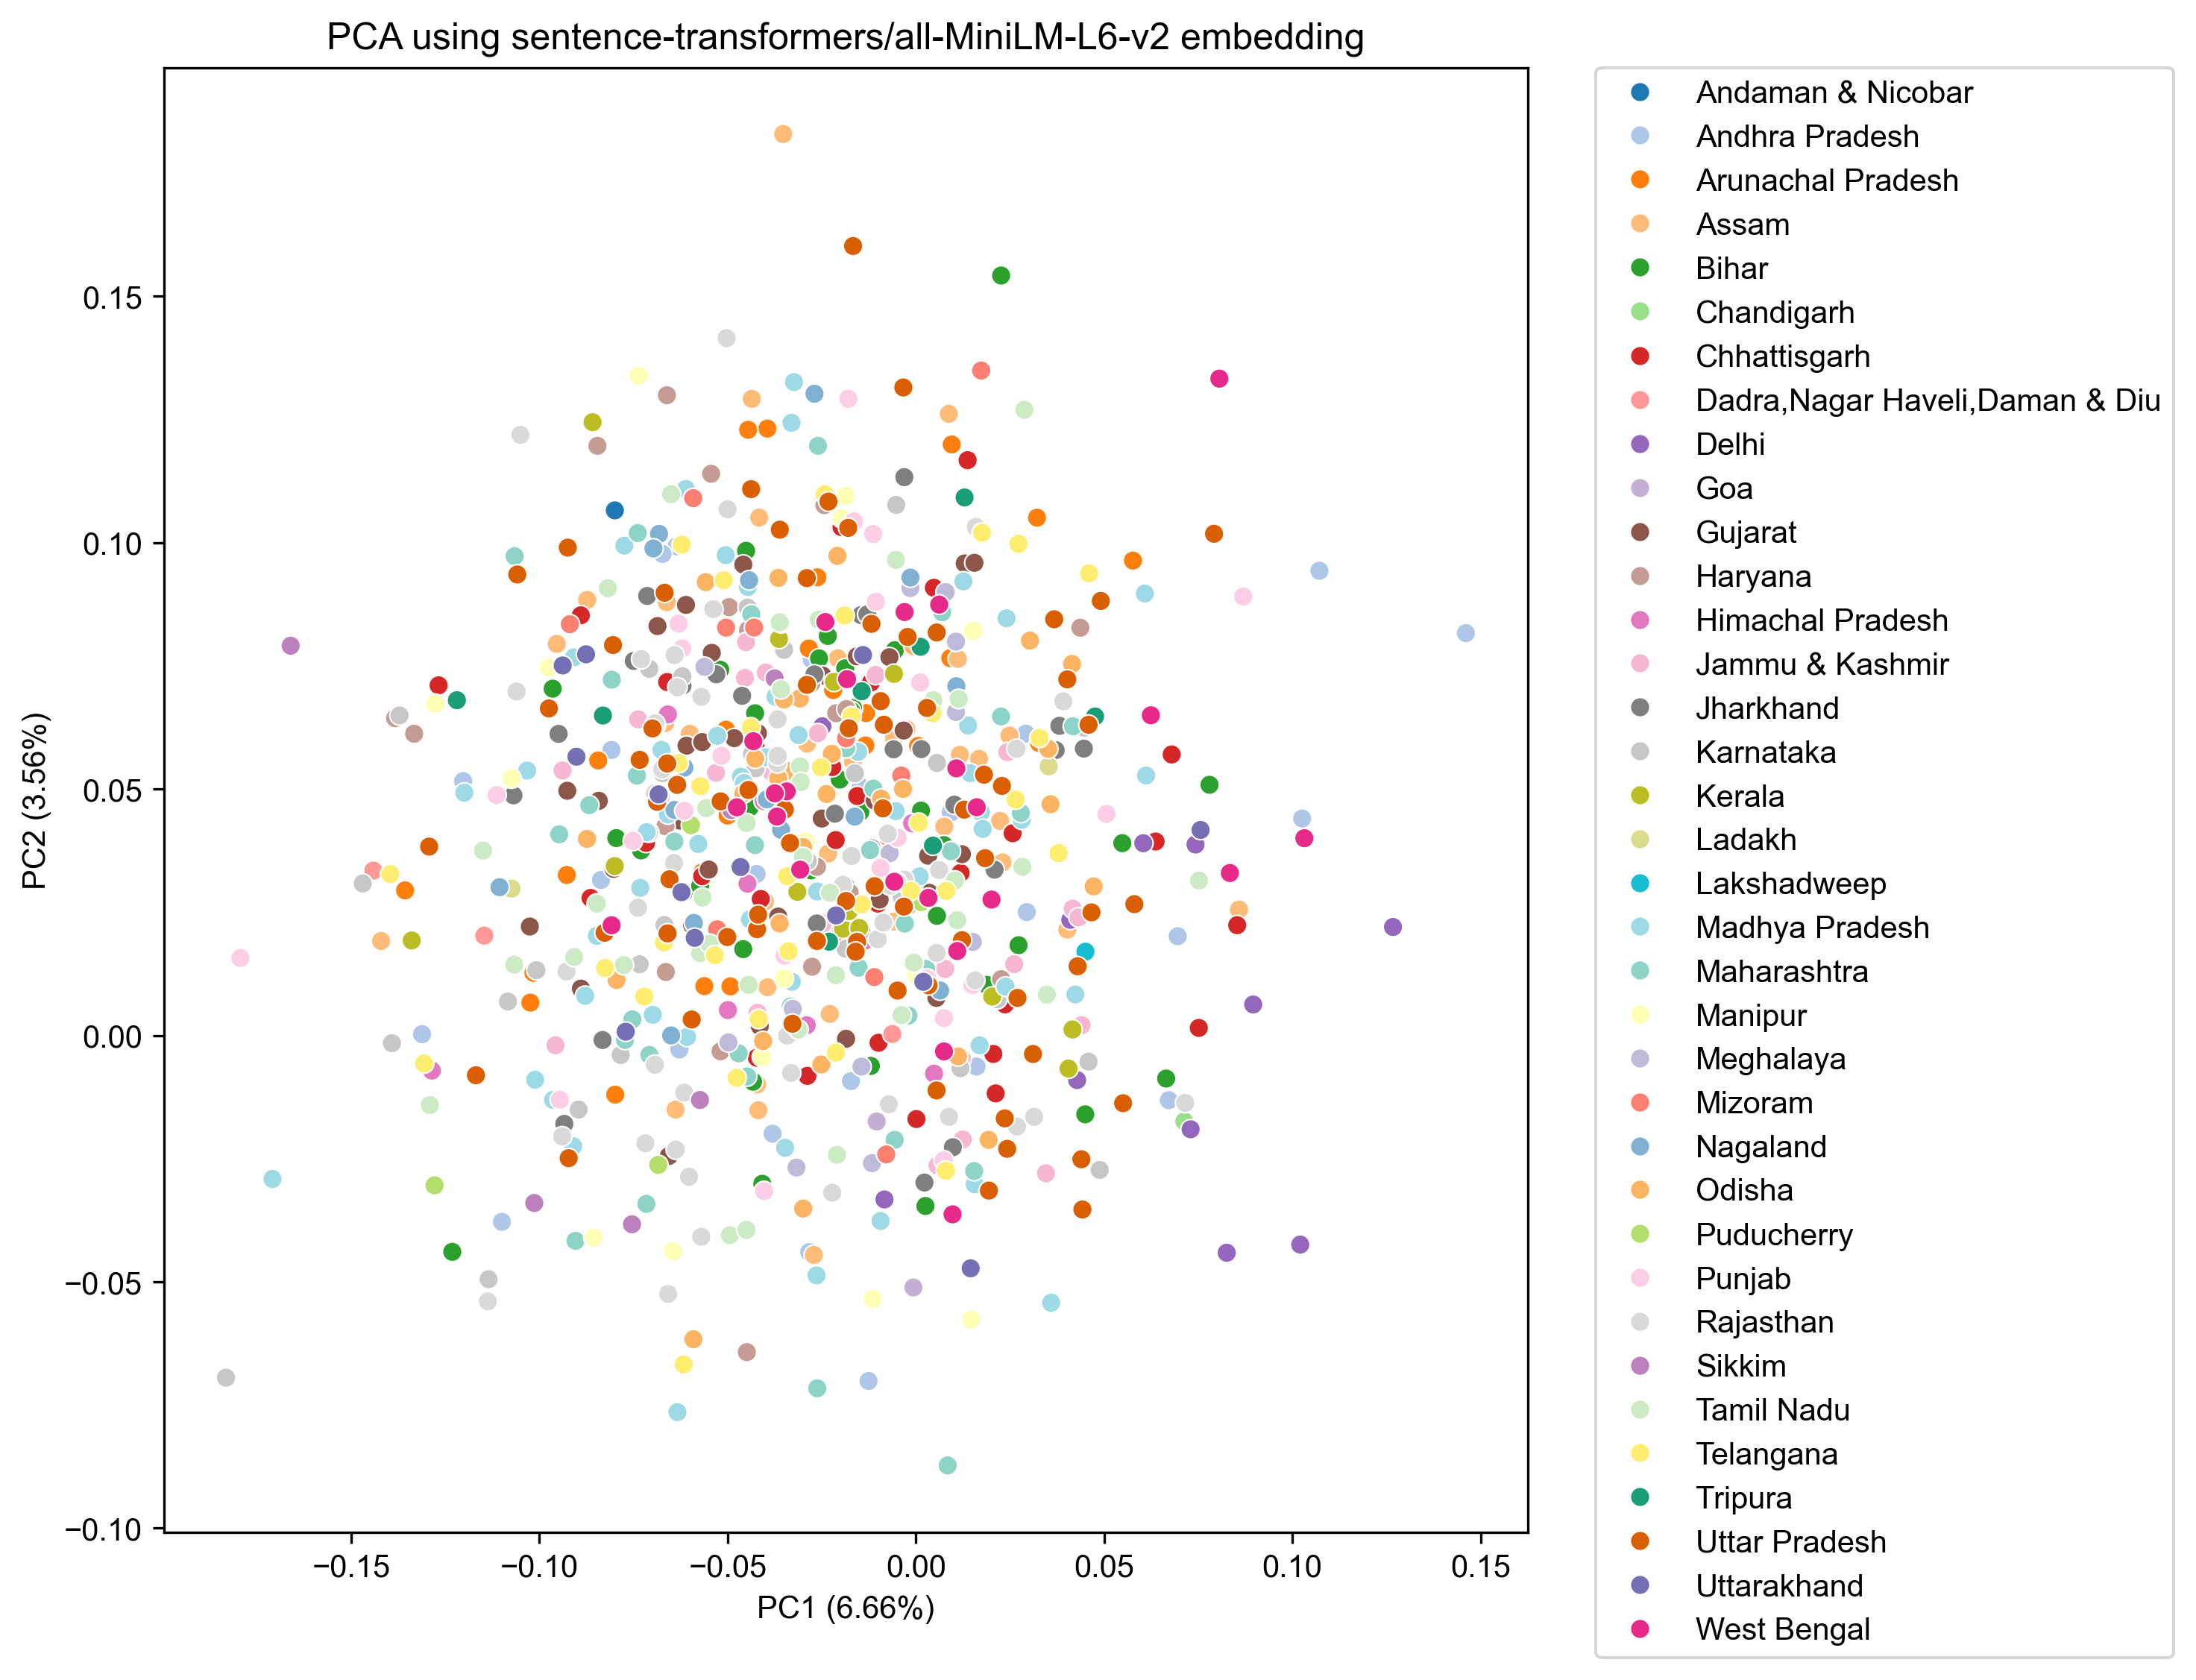

In [25]:
plt.figure(figsize=(10, 8))
plot_embedding(
    pca,
    labels=states,
    dims=[1, 2],
    color_map=palette,
    explained_var=exp_var,
    title=f"PCA using {model} embedding",
)

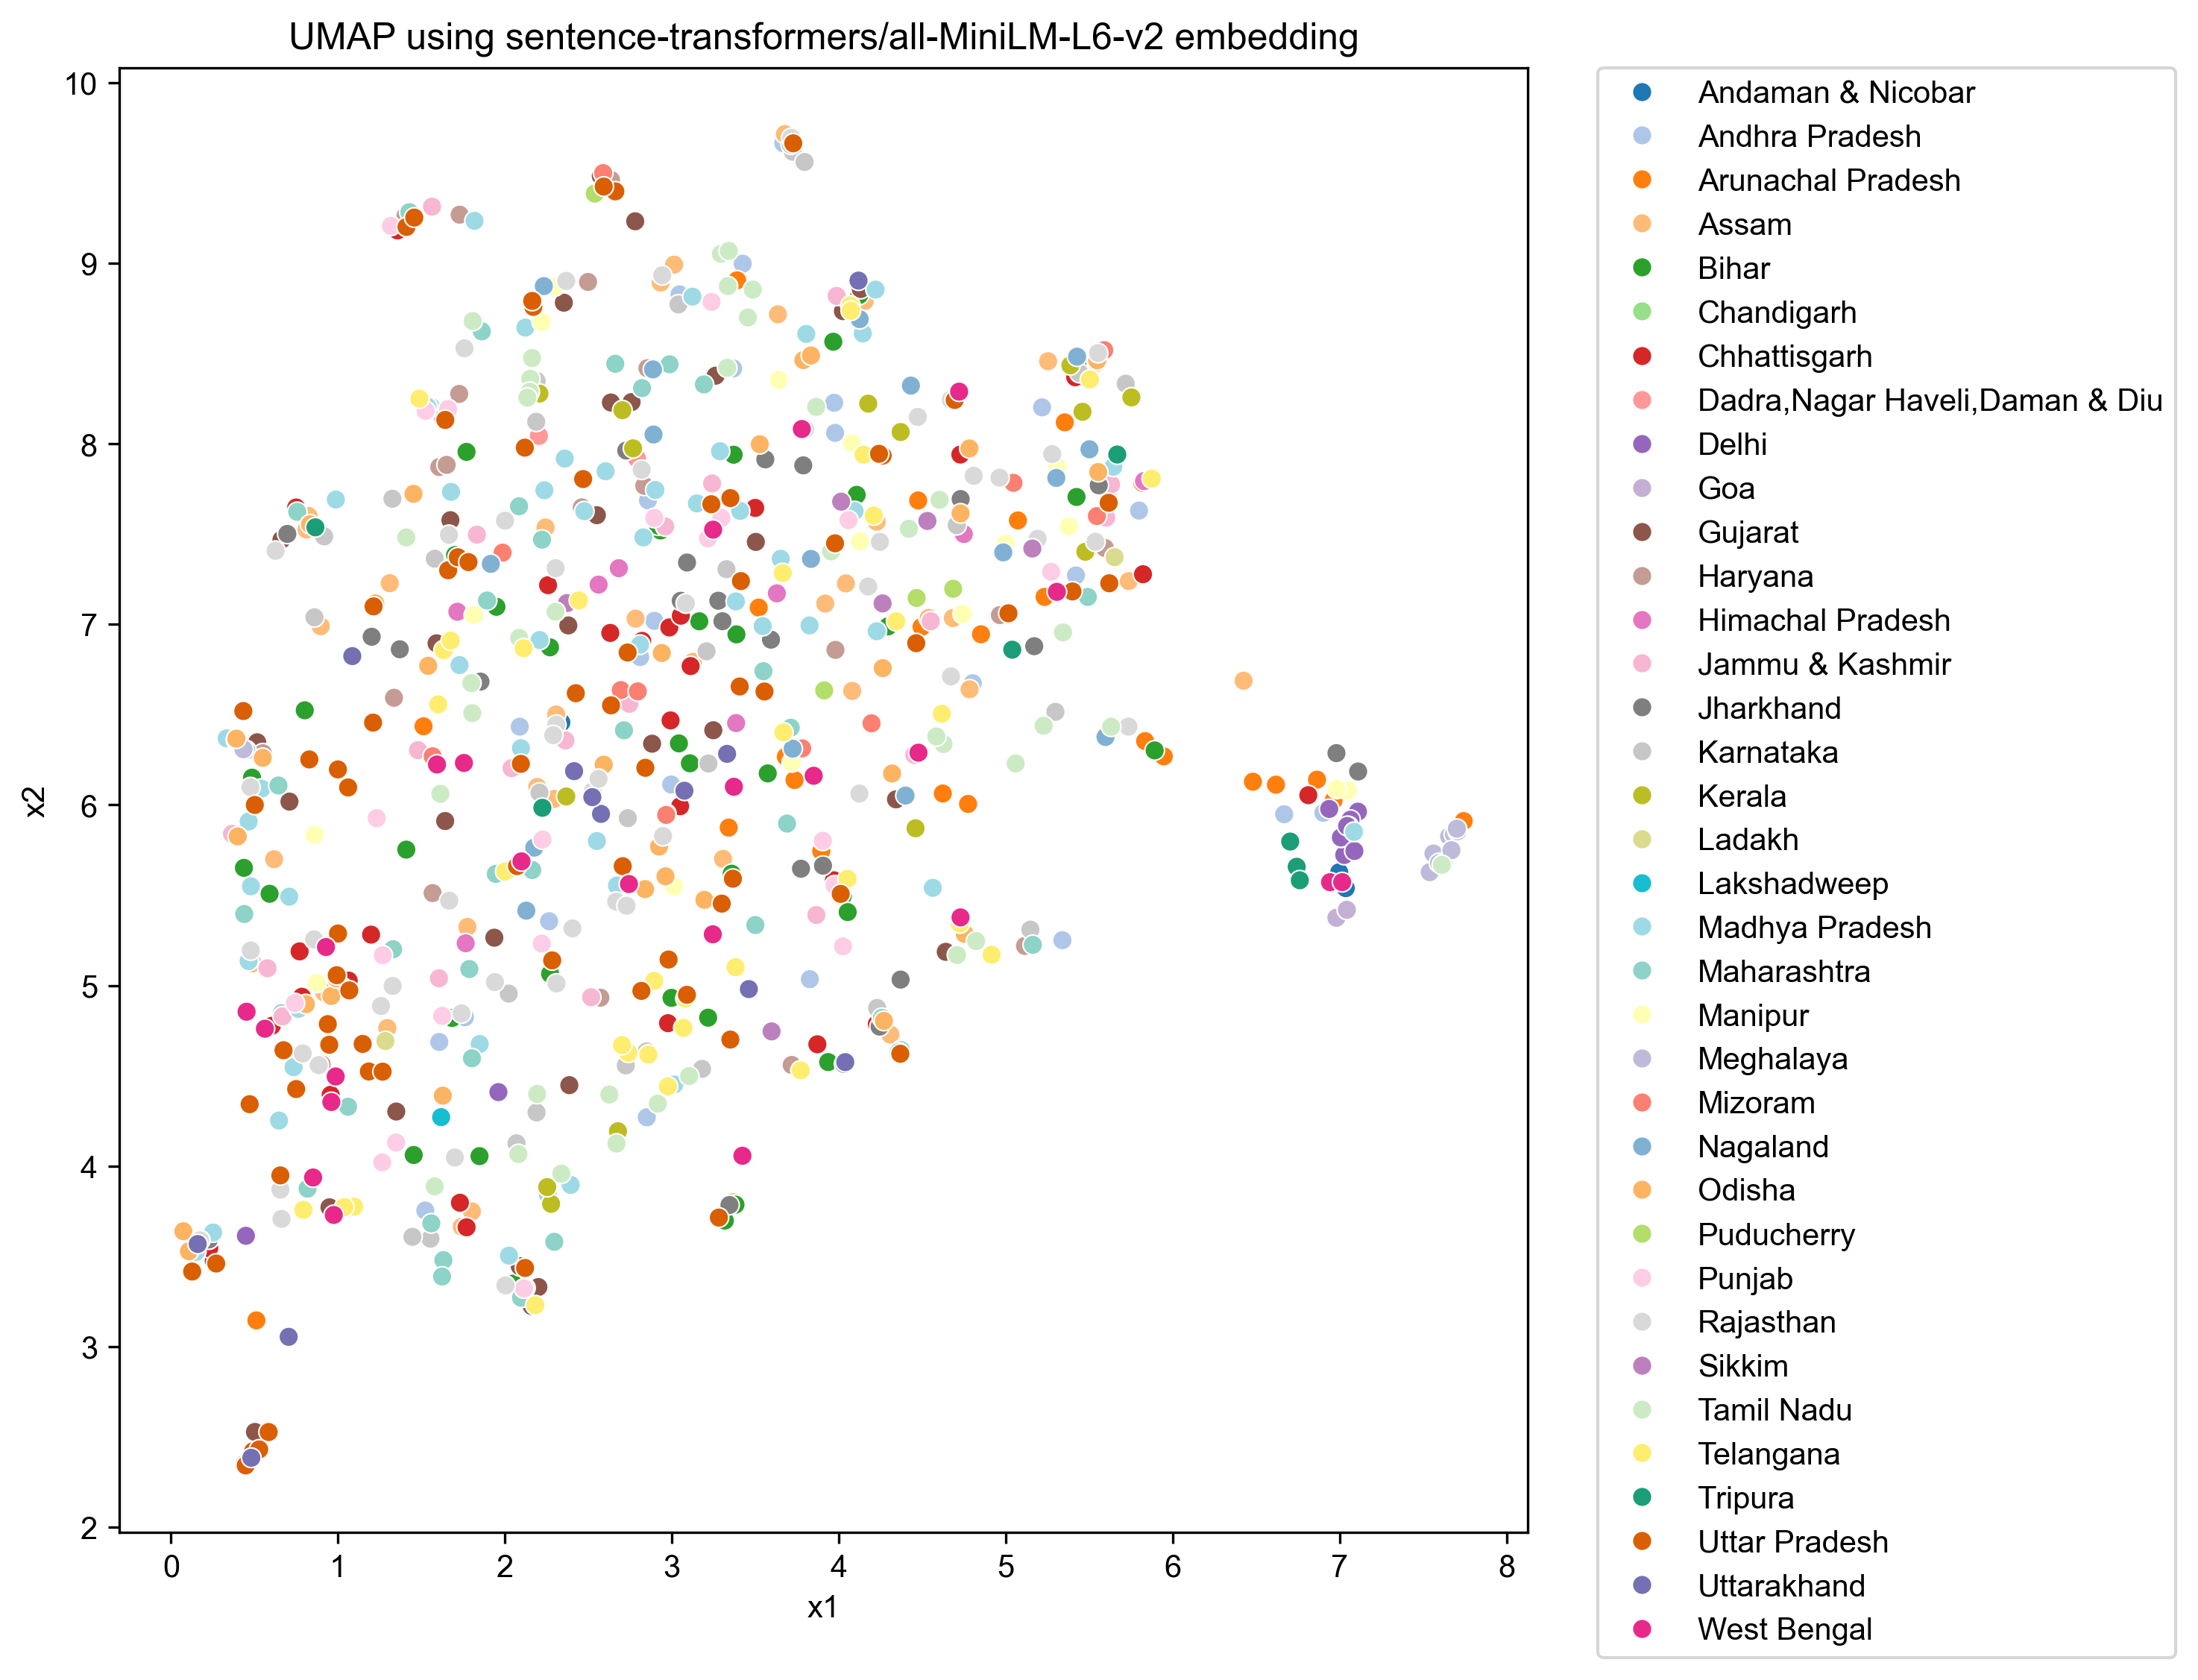

In [26]:
plt.figure(figsize=(10, 8))
plot_embedding(
    umap,
    labels=states,
    dims=[1, 2],
    color_map=palette,
    title=f"UMAP using {model} embedding",
)

/Users/saket/miniconda3/envs/alethia3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/saket/miniconda3/envs/alethia3/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


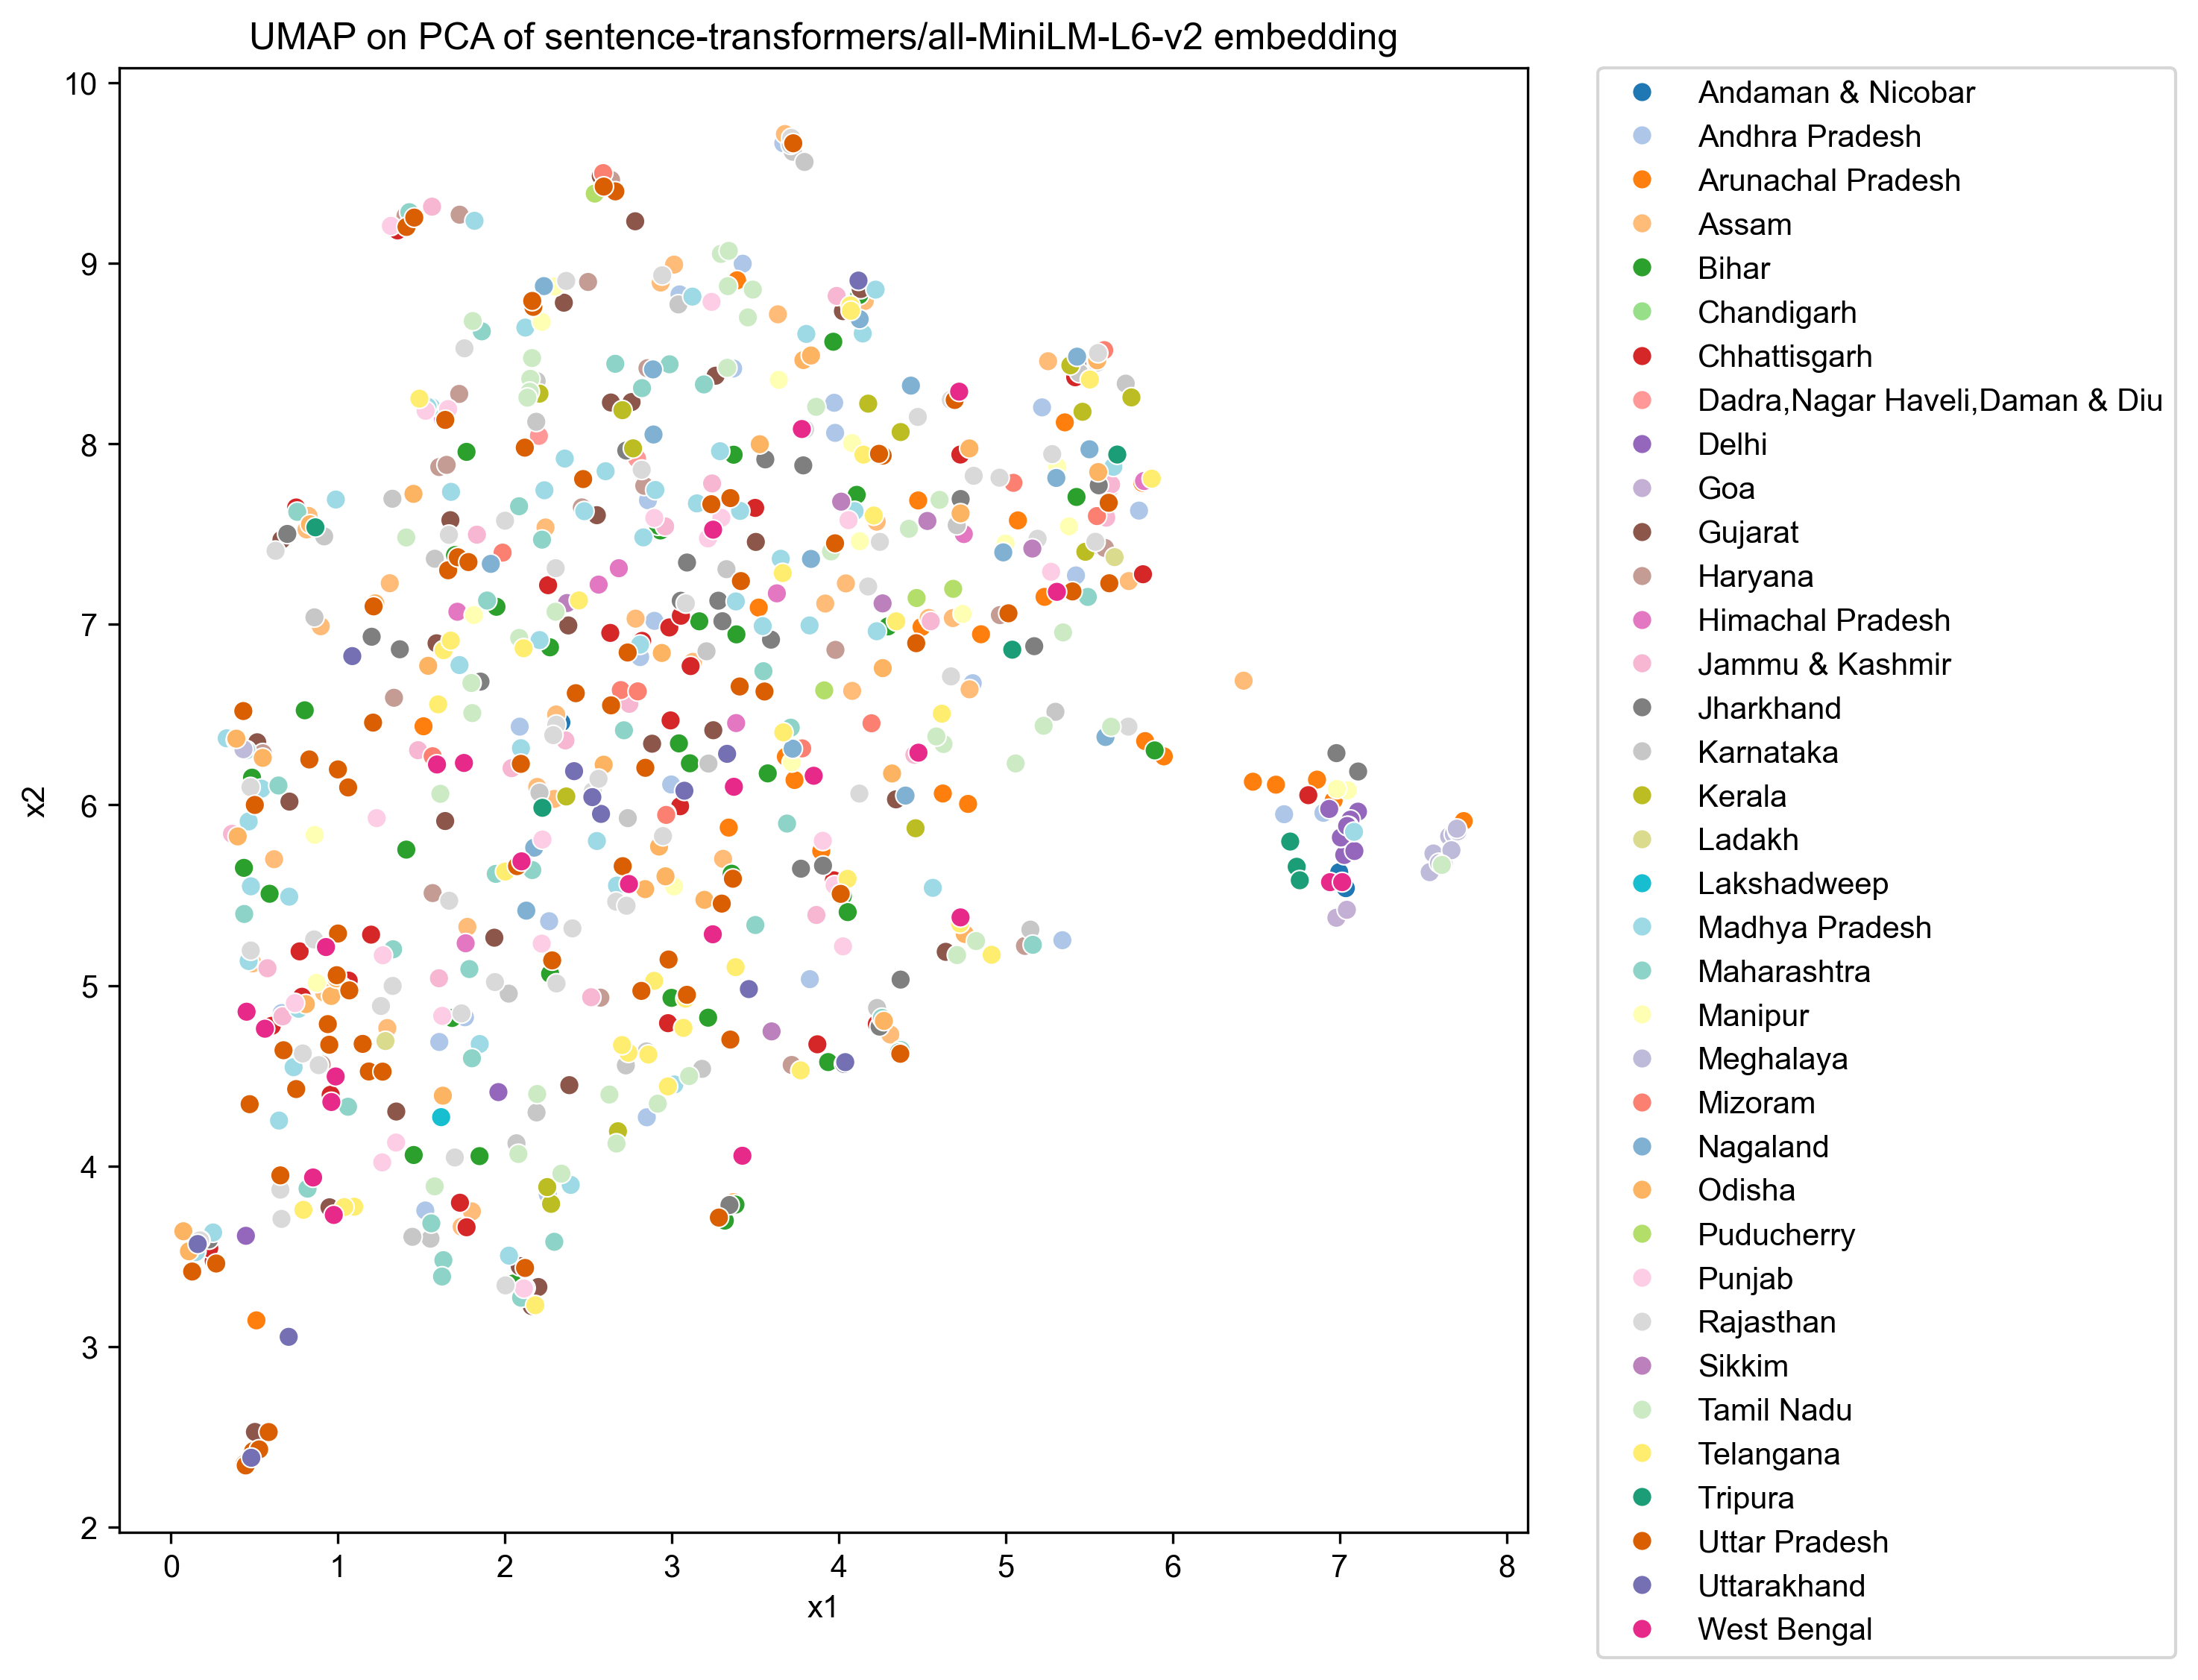

In [27]:
plt.figure(figsize=(10, 8))
umap_on_pca = do_umap(pca)

plot_embedding(
    umap_on_pca,
    labels=states,
    dims=[1, 2],
    color_map=palette,
    title=f"UMAP on PCA of {model} embedding",
)

## Try embedding with a different model 

The quality of embedding is usually a good indicative of how good the model is at differentiating different entitites.


In [ ]:
model = "Salesforce/SFR-Embedding-Mistral"
embedding = get_embeddings(
    texts=labels,
    model=model,
    return_labels=False,
    show_progress=True,
    force_cpu=False
)
umap = do_umap(embedding)

Loading Salesforce/SFR-Embedding-Mistral on CPU


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
pca, exp_var = do_pca(embedding, return_expl_var=True)
exp_var

In [ ]:
plt.figure(figsize=(10, 8))
plot_embedding(
    pca,
    labels=states,
    dims=[1, 2],
    color_map=palette,
    title="",
    explained_var=exp_var,
    title=f"PCA using {model} embedding",
)

In [ ]:
umap_on_pca = do_umap(pca)

In [ ]:
plt.figure(figsize=(10, 8))
plot_embedding(
    umap_on_pca,
    labels=states,
    dims=[1, 2],
    color_map=palette,
    title=f"UMAP on PCA of {model} embedding",
)